<a href="https://colab.research.google.com/github/FNSY96/Cartoonify-Images/blob/master/Cartoonify_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [0]:
import pandas as pd
import glob
import os
import cv2
import numpy as np
import urllib
import urllib.request as req
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image, display

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# # Authenticate and create the PyDrive client.
# # This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
fid = drive.ListFile({'q':"title='img.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('img.zip')
f.Upload()

    100% |████████████████████████████████| 993kB 21.2MB/s 


In [0]:
!unzip /content/img

Archive:  /content/img.zip
  inflating: Untitled.jpg            


In [0]:
# !apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
# import cv2
# print("imported openCV")

#Sample Code

In [0]:
test_root = '/content/'
for image_name in glob.glob(f'{test_root}/*.jpg'):
  image = mpimg.imread(image_name)

In [0]:
image.shape

(481, 321, 3)

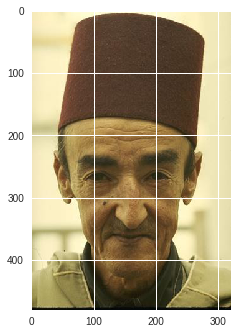

In [0]:
  plt.imshow(image)
  plt.show(True)

# Code

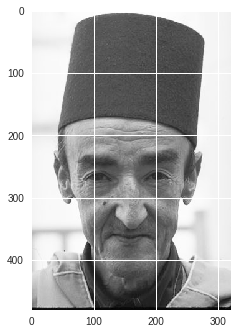

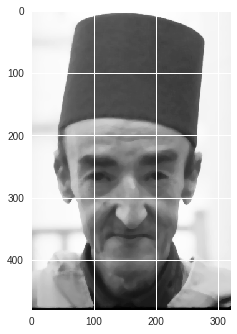

In [0]:
gray = cv2.cvtColor(255-image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
plt.show(True)
# applying median blur with 7 x 7 square apreture
median = cv2.medianBlur(gray,7)
plt.imshow(median)
plt.show(True)

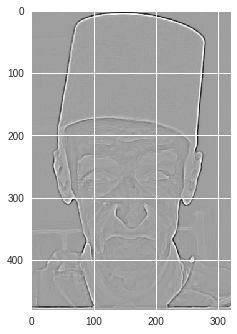

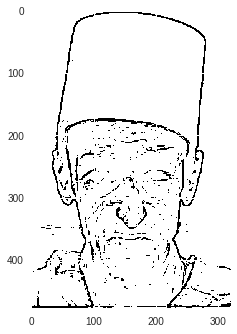

In [0]:
# applying laplacian filter with kernel size = 5
laplacian = cv2.Laplacian(median,ddepth = cv2.CV_64F,ksize = 5,scale = 1,delta = 1)
plt.imshow(laplacian)
plt.show(True)

#binary threshold black < 125 and white >= 125
ret,after_threshold = cv2.threshold(laplacian,125,255,cv2.THRESH_BINARY)
# after_threshold = cv2.adaptiveThreshold(laplacian, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 125, 1)
plt.imshow(after_threshold)
plt.show(True)

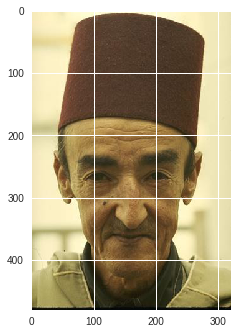

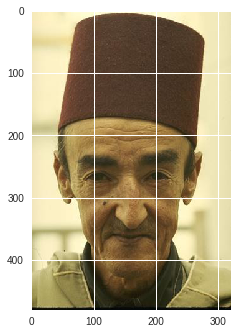

In [0]:
# small = cv2.resize(image, (0,0), fx=0.5, fy=0.5) 
# bilateral_filtering_input = small
bilateral_filtering_input = image
bilateral = cv2.bilateralFilter(bilateral_filtering_input,9, 35, 35)
plt.imshow(image)
plt.show(True)
plt.imshow(image)
plt.show(True)

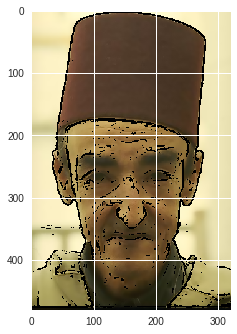

In [0]:
# since the after_threshold output has 3 channels RGB
# we must make also the outline (in gray scale) 
# to have 3 channels also
# http://www.emgu.com/wiki/files/3.0.0/document/html/e3f8abb7-3706-0ccd-46f0-8c57c2232585.htm
# useful link to solve the problem

three_channel_thresholded = 255-cv2.cvtColor(after_threshold.astype('uint16'), cv2.COLOR_GRAY2BGR)
cartoon = cv2.bitwise_and(bilateral.astype('uint16'), three_channel_thresholded.astype('uint16'))
plt.imshow(cartoon)
plt.show(True)